# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [98]:
# Load pickled data
import pickle

training_file = "dataset/train.p"
validation_file= "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [99]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

#Number of validation examples
n_validation = X_validation.shape[0]

#Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = str(X_train[2].shape[0]) + "x" + str(X_train[2].shape[1])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

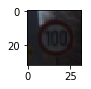

The image belongs to class: 7


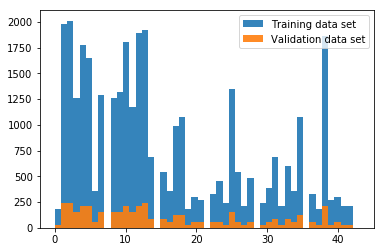

In [100]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()
print("The image belongs to class: " + str(y_train[index]))
%matplotlib inline

nb_bins = np.linspace(0, 43, 50)
plt.hist(y_train, nb_bins, alpha=0.9, label='Training data set')
plt.hist(y_validation, nb_bins, alpha=0.9, label='Validation data set')
plt.legend(loc='upper right')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Mean Subtraction

In [101]:
def mean_subtract(X_train, X_validation=None, X_test=None, combined_mean=False):
    if(combined_mean):
        #1 Calculate mean across all channels(RGB) at once and then subtracting it from every pixel
        #1.1 Calculate mean
        mean_all_channels = np.mean(X_train)
        #1.2 Subtract mean
        X_train = X_train - mean_all_channels
        X_validation = X_validation - mean_all_channels
        X_test = X_test - mean_all_channels
    
    else:
        #2 Calculate mean across each channel (R, G and B respectively) and subtract from corresponding channels
        #2.1 Split channels
        channel_red_train, channel_red_validation, channel_red_test = X_train[:,:,:,0], X_validation[:,:,:,0], X_test[:,:,:,0]
        channel_green_train, channel_green_validation, channel_green_test = X_train[:,:,:,1], X_validation[:,:,:,1], X_test[:,:,:,1]
        channel_blue_train, channel_blue_validation, channel_blue_test = X_train[:,:,:,2], X_validation[:,:,:,2], X_test[:,:,:,2]

        #2.2 Calculate mean only on training data
        mean_red = np.mean(channel_red_train)
        mean_green = np.mean(channel_green_train)
        mean_blue = np.mean(channel_blue_train)
        #2.2 Subtract mean
        #Training
        channel_red_train = channel_red_train - mean_red
        channel_green_train = channel_green_train - mean_green
        channel_blue_train = channel_blue_train - mean_blue
        #Validation
        channel_red_validation = channel_red_validation - mean_red
        channel_green_validation = channel_green_validation - mean_green
        channel_blue_validation = channel_blue_validation - mean_blue
        #Test
        channel_red_test = channel_red_test - mean_red
        channel_green_test = channel_green_test - mean_green
        channel_blue_test = channel_blue_test - mean_blue

        #2.3 Concatenate all the channels
        X_train = np.concatenate((channel_red_train[:,:,:,None], channel_green_train[:,:,:,None], channel_blue_train[:,:,:,None]), axis=3)
        X_validation = np.concatenate((channel_red_validation[:,:,:,None], channel_green_validation[:,:,:,None], channel_blue_validation[:,:,:,None]), axis=3)
        X_test = np.concatenate((channel_red_test[:,:,:,None], channel_green_test[:,:,:,None], channel_blue_test[:,:,:,None]), axis=3)
    
    return X_train, X_validation, X_test
X_train, X_validation, X_test = mean_subtract(X_train, X_validation=X_validation, X_test=X_test, combined_mean=False)


### Normalization

In [102]:
#Calculate standard deviation of all channels in training data set
stddev_training = np.std(X_train)
X_train /= stddev_training
X_validation /= stddev_training
X_test /= stddev_training

### Model Architecture

### Define and declare hyper parameters for architecture here

In [103]:
import tensorflow as tf
mu = 0
sigma = 0.1
dropout_keep_prob = 0.7

### Network architecture. Starting with LeNet

In [104]:
from tensorflow.contrib.layers import flatten
def run_network_arch (x, weights, biases):
    
    #Convolutional layer - I. Input is 32x32x3. Output is 28x28x6
    conv1 = tf.nn.conv2d(x, weights["wconv1"], strides=[1, 1, 1, 1], padding="VALID") #+ biases["bconv1"]
    conv1 = tf.nn.bias_add(conv1, biases["bconv1"])
    
    # ReLU Activation - I
    conv1 = tf.nn.elu(conv1)

    # Pooling. Input is 28x28x6. Output is 14x14x6.
    pool1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer II. Input is 14x14x6. Output is 10x10x16.
    conv2 = tf.nn.conv2d(pool1, weights["wconv2"], strides=[1, 1, 1, 1], padding='VALID') #+ biases["bconv2"]
    conv2 = tf.nn.bias_add(conv2, biases["bconv2"])
    
    # ReLU Activation - II
    conv2 = tf.nn.elu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)
    
    # Fully Connected Layer - I. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(flat, weights["wfull1"]), biases["bfull1"])
    
    # ReLU Activation - III
    fc1 = tf.nn.elu(fc1)
    
    #Dropout-I
    fc1 = tf.nn.dropout(fc1, keep_prob=dropout_keep_prob)

    # Fully Connected Layer - II. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights["wfull2"]), biases["bfull2"])
    
    # ReLU Activation - IV
    fc2 = tf.nn.elu(fc2)

    # Fully Connected Layer - III. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights["wfull3"]), biases["bfull3"])
    #logits = tf.matmul(fc2, weights["wfull3"]) + biases["bfull3"]
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Define and declare hyper parameters for training here

In [105]:
#learning_rate = 0.0004
batch_size = 32
num_of_epochs = 20
#l2_regularize_penalty = 0.001

### Declare TensorFlow model

In [106]:
from tensorflow.contrib.layers import xavier_initializer
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_labels = tf.one_hot(y, n_classes)
#Declare weights here
weights = {
    "wconv1": tf.Variable(tf.random_uniform(shape=(5, 5, 3, 6), minval= -2.45/np.sqrt(batch_size*32*32*3), maxval=2.45/np.sqrt(batch_size*32*32*3))),
    "wconv2": tf.Variable(tf.random_uniform(shape=(5, 5, 6, 16), minval= -2.45/np.sqrt(batch_size*14*14*6), maxval=2.45/np.sqrt(batch_size*14*14*6))),
    "wfull1": tf.Variable(tf.random_uniform(shape=(400, 120), minval= -2.45/np.sqrt(batch_size*400), maxval=2.45/np.sqrt(batch_size*400))),
    "wfull2": tf.Variable(tf.random_uniform(shape=(120, 84), minval= -2.45/np.sqrt(batch_size*120), maxval=2.45/np.sqrt(batch_size*120))),
    "wfull3": tf.Variable(tf.random_uniform(shape=(84, n_classes), minval= -2.45/np.sqrt(batch_size*84), maxval=2.45/np.sqrt(batch_size*84)))
 }
#Declare biases here
biases = {
    "bconv1": tf.Variable(tf.zeros(6)),
    "bconv2": tf.Variable(tf.zeros(16)),
    "bfull1": tf.Variable(tf.zeros(120)),
    "bfull2": tf.Variable(tf.zeros(84)),
    "bfull3": tf.Variable(tf.zeros(n_classes))
}

### Training Pipeline

In [107]:
logits = run_network_arch(x, weights, biases)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_labels)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)

### Evalute performance

In [108]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train in TensorFlow session

In [12]:
from sklearn.utils import shuffle
saver = tf.train.Saver()
with tf.Session() as sess:
    print("Training...")
    sess.run(tf.global_variables_initializer())
    for i in range(num_of_epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, len(X_train), batch_size):
            current_input_batch = X_train[offset: offset + batch_size]
            current_labels_batch = y_train[offset: offset + batch_size]
            sess.run(training_operation, feed_dict={x: current_input_batch, y: current_labels_batch})

        training_accuracy = evaluate(X_train, y_train)
        print("Training accuracy for Epoch " +  str(i) + " is: ", str(training_accuracy))
        validation_accuracy = evaluate(X_validation, y_validation)
        print("Validation accuracy for Epoch " +  str(i) + " is: ", str(validation_accuracy))
        print("===============================")
    saver.save(sess, './model.ckpt')
    

Training...
Training accuracy for Epoch 0 is:  0.856375183197
Validation accuracy for Epoch 0 is:  0.807482993035
Training accuracy for Epoch 1 is:  0.941492571629
Validation accuracy for Epoch 1 is:  0.875963718659
Training accuracy for Epoch 2 is:  0.962441449467
Validation accuracy for Epoch 2 is:  0.89433106576
Training accuracy for Epoch 3 is:  0.971177332682
Validation accuracy for Epoch 3 is:  0.903401360544
Training accuracy for Epoch 4 is:  0.976436104486
Validation accuracy for Epoch 4 is:  0.908163265333
Training accuracy for Epoch 5 is:  0.979798270065
Validation accuracy for Epoch 5 is:  0.918594104362
Training accuracy for Epoch 6 is:  0.983074226271
Validation accuracy for Epoch 6 is:  0.910657596399
Training accuracy for Epoch 7 is:  0.983534009598
Validation accuracy for Epoch 7 is:  0.909977324101
Training accuracy for Epoch 8 is:  0.987614586626
Validation accuracy for Epoch 8 is:  0.925396825397
Training accuracy for Epoch 9 is:  0.98882151786
Validation accuracy fo

## Find accuracy on test dataset

### Re-declare placeholders and variables here as graph is reset

In [46]:
from tensorflow.contrib.layers import xavier_initializer
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_labels = tf.one_hot(y, n_classes)
#Declare weights here
weights = {
    "wconv1": tf.Variable(tf.random_uniform(shape=(5, 5, 3, 6), minval= -2.45/np.sqrt(batch_size*32*32*3), maxval=2.45/np.sqrt(batch_size*32*32*3))),
    "wconv2": tf.Variable(tf.random_uniform(shape=(5, 5, 6, 16), minval= -2.45/np.sqrt(batch_size*14*14*6), maxval=2.45/np.sqrt(batch_size*14*14*6))),
    "wfull1": tf.Variable(tf.random_uniform(shape=(400, 120), minval= -2.45/np.sqrt(batch_size*400), maxval=2.45/np.sqrt(batch_size*400))),
    "wfull2": tf.Variable(tf.random_uniform(shape=(120, 84), minval= -2.45/np.sqrt(batch_size*120), maxval=2.45/np.sqrt(batch_size*120))),
    "wfull3": tf.Variable(tf.random_uniform(shape=(84, n_classes), minval= -2.45/np.sqrt(batch_size*84), maxval=2.45/np.sqrt(batch_size*84)))
 }
#Declare biases here
biases = {
    "bconv1": tf.Variable(tf.zeros(6)),
    "bconv2": tf.Variable(tf.zeros(16)),
    "bfull1": tf.Variable(tf.zeros(120)),
    "bfull2": tf.Variable(tf.zeros(84)),
    "bfull3": tf.Variable(tf.zeros(n_classes))
}
logits = run_network_arch(x, weights, biases)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Evaluate performance on test data set

In [109]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './model.ckpt')
    test_accuracy = evaluate(X_test, y_test)
    print("Test accuracy is: " + str(test_accuracy))
    

Test accuracy is: 0.925732383233


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

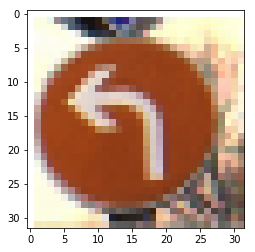

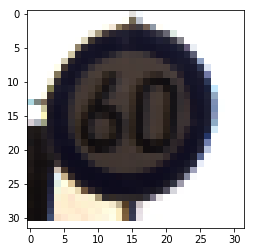

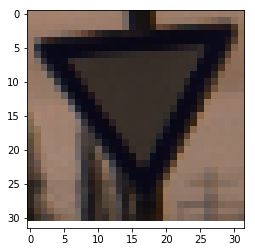

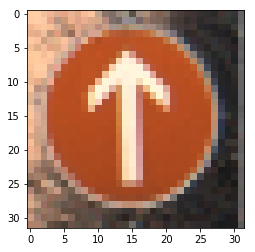

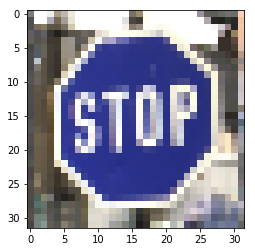

In [55]:
from glob import glob
import cv2
test_img_path = glob("test-images/*.jpg")
images = []

for image_path in test_img_path:
    image = cv2.imread(image_path)
    #Resizing to (32, 32) as LeNet architecture used in this pipeline was trained on 32 x 32 images
    image = cv2.resize(image, (32, 32))
    plt.imshow(image)
    plt.show()
    images.append(image)
images = np.array(images)
images = mean_subtract(images, X_validation=images, X_test=images, combined_mean=False)[0]
images /= np.std(images)
correct_labels = np.array([34, 3, 13, 35, 14])

### Predict the Sign Type for Each Image

In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Re-declare placeholders and variables here as graph is reset

In [83]:
from tensorflow.contrib.layers import xavier_initializer
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_labels = tf.one_hot(y, n_classes)
#Declare weights here
weights = {
    "wconv1": tf.Variable(tf.random_uniform(shape=(5, 5, 3, 6), minval= -2.45/np.sqrt(batch_size*32*32*3), maxval=2.45/np.sqrt(batch_size*32*32*3))),
    "wconv2": tf.Variable(tf.random_uniform(shape=(5, 5, 6, 16), minval= -2.45/np.sqrt(batch_size*14*14*6), maxval=2.45/np.sqrt(batch_size*14*14*6))),
    "wfull1": tf.Variable(tf.random_uniform(shape=(400, 120), minval= -2.45/np.sqrt(batch_size*400), maxval=2.45/np.sqrt(batch_size*400))),
    "wfull2": tf.Variable(tf.random_uniform(shape=(120, 84), minval= -2.45/np.sqrt(batch_size*120), maxval=2.45/np.sqrt(batch_size*120))),
    "wfull3": tf.Variable(tf.random_uniform(shape=(84, n_classes), minval= -2.45/np.sqrt(batch_size*84), maxval=2.45/np.sqrt(batch_size*84)))
 }
#Declare biases here
biases = {
    "bconv1": tf.Variable(tf.zeros(6)),
    "bconv2": tf.Variable(tf.zeros(16)),
    "bfull1": tf.Variable(tf.zeros(120)),
    "bfull2": tf.Variable(tf.zeros(84)),
    "bfull3": tf.Variable(tf.zeros(n_classes))
}
logits = run_network_arch(x, weights, biases)
softmax = tf.nn.softmax(logits)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Evaluate performance on 5 images downloaded from the Internet

In [88]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './model.ckpt')
    pred_logits = sess.run(softmax, feed_dict={x:images, y:correct_labels})
    pred_labels = np.argmax(pred_logits, axis=1)
    accuracy = evaluate(images, correct_labels)
    print(accuracy)
    print(pred_labels)

0.40000000596
[34 10 13 13 38]


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [96]:
import csv
lines = []
with open("signnames.csv") as datafile:
        reader = csv.reader(datafile)
        for line in reader:
            lines.append(line)
#Removed column header labels
lines = lines[1:]

with tf.Session() as sess:
    saver.restore(sess, './model.ckpt')
    top_5_softmax_prob, top_5_softmax_classes = sess.run(tf.nn.top_k(tf.constant(pred_logits), k=5))
    for i in range(len(top_5_softmax_prob)):
        print("Image " + str(i + 1) + " True class is: " + lines[correct_labels[i]][1])
        print("Top 5 softmax probabilities are:")
        for j in range(len(top_5_softmax_prob[i])):
            print("Probability: ",top_5_softmax_prob[i][j], " for class: ", lines[top_5_softmax_classes[i][j]][1])
        print("========================================")

Image 1 True class is: Turn left ahead
Top 5 softmax probabilities are:
Probability:  0.99716  for class:  Turn left ahead
Probability:  0.00234798  for class:  End of all speed and passing limits
Probability:  0.000298687  for class:  Priority road
Probability:  0.00016642  for class:  No passing for vehicles over 3.5 metric tons
Probability:  2.09311e-05  for class:  Speed limit (60km/h)
Image 2 True class is: Speed limit (60km/h)
Top 5 softmax probabilities are:
Probability:  0.927024  for class:  No passing for vehicles over 3.5 metric tons
Probability:  0.0518917  for class:  Turn left ahead
Probability:  0.0111462  for class:  Ahead only
Probability:  0.00641871  for class:  Speed limit (80km/h)
Probability:  0.00165882  for class:  Road work
Image 3 True class is: Yield
Top 5 softmax probabilities are:
Probability:  1.0  for class:  Yield
Probability:  4.72345e-14  for class:  Ahead only
Probability:  1.57385e-18  for class:  Turn right ahead
Probability:  1.69605e-20  for class

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 